# Processing a Folder of Tip Logs
Tim Tyree<br>
6.22.2021

In [1]:
from lib.my_initialization import *
from lib import *
import trackpy, pandas as pd, numpy as np
from lib.routines.comp_imsd import *

%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart


In [2]:
1

1

In [2]:
darkmode=True
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# particle tracking by nearest neighbors for a folder of tip logs with trajectory unwrapping at the end

In [4]:
# #find file interactively
# print("please select a file from within the desired folder.")
# file = search_for_file()
# # file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/Log/ic001.21_log.csv'
# print(file)
# # file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/Log/ic_200x200.001.12_log.csv'
# input_fn=file
# ds=10
# width=10
ds=5
width=200
height=width
DS=ds/width


# #token LR local data run 
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/Log/ic001.21_log.csv"
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40/Log/ic012.31_log.csv"
# #token FK local data run 
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/Log/ic200x200.0.1_log.csv"
# # input_fn=search_for_file()
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# df=pd.read_csv(input_fn)
# print(input_fn)
# DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")
file=input_fn
trgt='log.csv'
assert(file[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(file,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

number of files in list: 77


In [6]:
#works for repositories outside of care
# input_fn=file
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
ic_suite_fn=os.path.dirname(trial_folder_name)
# ic_suite_fn=ic_suite_fn.split('/')[-1]
print(ic_suite_fn)
trial_folder_name=trial_folder_name.split('/')[-1]
print(trial_folder_name)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR
param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40


In [7]:
#generate trajectories, unwrapped trajectories, and mean squared displacements for folder of tip logs
npartitions=os.cpu_count()
npartitions=3#10
# #particle models
# ds=10
# width=10
# kwargs={
#     'input_fn_lst':file_name_list,
#     'L':width,
#     'DS':ds/width,
#     'use_cache_0':True,
#     'use_cache_1':True,
#     'npartitions':npartitions,
#     'sr':3*width,
#     'mem':0,
#     'trial_folder_name':trial_folder_name,
#     'ic_suite_fn':ic_suite_fn
# }

#full models
# ds=5
# width=200
kwargs={
    'input_fn_lst':file_name_list,
    'L':width,
    'DS':ds/width,
    'use_cache_0':True,
    'use_cache_1':True,
    'npartitions':npartitions,
    'sr':3*width,
    'mem':0,
    'trial_folder_name':trial_folder_name,
    'ic_suite_fn':ic_suite_fn
}
DS,width,trial_folder_name

(0.025, 200, 'param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40')

In [8]:
#test the routine that takes log to unwrapped trajectory
testing=False
if testing:
    output_file_name=run_routine_log_to_unwrapped_trajectory(input_fn, use_cache=False,**kwargs)
    print(output_file_name)

In [9]:
beep(10)

0

In [10]:
1

1

In [ ]:
df_summary=workflow_reduce_logs_to_diffcoeff_summary(**kwargs)
beep(1)

Frame 695475: 2 trajectories present.


In [122]:
#TODO(later): fix D and Delta_D measurements for functions that compute df_summary
workflow_reduce_logs_to_diffcoeff_summary

<function lib.routines.dag_log_to_msd.workflow_reduce_logs_to_diffcoeff_summary(input_fn_lst, L, DS, use_cache_0=True, use_cache_1=False, npartitions=2, **kwargs)>

# analyze annihilation/creation events

## annihilation events

In [115]:
#select a file from trajectories/
# input_fn=search_for_file()

# # #particle model
# # input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/trajectories/pbc_particle_log81_traj_sr_30_mem_0.csv"
# #DONE?: attraction with annihilation and with diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log3_log.csv"
# #TODO: attraction with annihilation but without diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"
# ds=10
# width=10
# pid_col='pid_explicit'


# #LR
# # # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.21_traj_sr_600_mem_0.csv'
# # # # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic004.13_traj_sr_600_mem_0.csv'

# #FK
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/trajectories/ic200x200.0.28_traj_sr_600_mem_0.csv"
# # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
ds=5
width=200
pid_col='particle'
t_col='t'

height=width
df=pd.read_csv(input_fn);print(input_fn)
DT=np.around(get_DT(df,pid_col=pid_col),5);print(f"the time resolution is {DT} ms.")
DS=ds/width
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv
the time resolution is 0.025 ms.


In [116]:
trgt=input_fn[input_fn.find('_traj_'):]
# trgt='_traj_sr_600_mem_0.csv'
assert(input_fn[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(input_fn,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

number of files in list: 125


In [117]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']
print(f"termination time was {df[t_col].max():.2f} ms")

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

termination time was 29999.98 ms
printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025:
count    51478.000000
mean         5.472239
std         13.103651
min         -0.000000
25%          0.100000
50%          0.425000
75%          2.225000
max        231.100000
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [54]:
# df.head()

In [155]:
# #particle model
min_duration=40  #20. #ms # a pair of particles is considered if their lifetime is at least min_range
min_range   =0  #cm  # a pair of particles is considered if their max distance is at least min_range
filter_beginning=True
use_min_duration=True
use_grad_voltage=False
range_threshold=10 #cm #filter any deaths occurring at ranges exceeding range_threshold
round_t_to_n_digits=5
tmin=0.  #filter all times earlier than tmin? i think so?
max_dur=0.#ms

# #full model fk
# min_duration=300##20. #ms
# min_range   =.5  #cm
# filter_beginning=True
# use_min_duration=True
# use_grad_voltage=True
# range_threshold=.1 #cm #filter any deaths occurring at ranges exceeding range_threshold
# tmin=100#ms
# max_dur=150#ms #consider no more than the last max_dur milliseconds of either trajectory

#full model lr (and fk)
min_duration=50##20. #ms
min_range   =.5#1.#.2#  #cm #.2 and 1. had 3 events available...
filter_beginning=True #i think this does nothing...
use_min_duration=False
use_grad_voltage=True
range_threshold=.1 #cm #filter any deaths occurring at ranges exceeding range_threshold
tmin=100#ms
max_dur=149#500#ms#150# #consider no more than the last max_dur milliseconds of either trajectory


# filter_beginning=False
# use_min_duration=False

npartitions=os.cpu_count()-2
# npartitions=10#1

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
#     'DT':DT,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
    'npartitions':npartitions,
    'filter_beginning':filter_beginning,
    'use_grad_voltage':use_grad_voltage,
    'use_min_duration':use_min_duration,
    'range_threshold':range_threshold,
    'round_t_to_n_digits':round_t_to_n_digits,
    'tmin':tmin,
    'pid_col':pid_col,
    't_col':t_col,
    'max_dur':max_dur,
    'folder_out_name':f'annihilations_mindur_{min_duration}_maxdur_{max_dur}_minrange_{min_range}_rangethresh_{range_threshold}'
}#'folder_out_name':f'annihilations
kwargs

{'width': 200,
 'height': 200,
 'ds': 5,
 'printing': False,
 'min_range': 0.5,
 'min_duration': 50,
 'npartitions': 10,
 'filter_beginning': True,
 'use_grad_voltage': True,
 'use_min_duration': False,
 'range_threshold': 0.1,
 'round_t_to_n_digits': 5,
 'tmin': 100,
 'pid_col': 'particle',
 't_col': 't',
 'max_dur': 149,
 'folder_out_name': 'annihilations_mindur_50_maxdur_149_minrange_0.5_rangethresh_0.1'}

In [156]:
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)
def routine(input_fn):
    return routine_traj_to_annihilation(input_fn)

In [157]:
use_test=False
if use_test:
    df=pd.read_csv(routine(input_fn))
    print(df.head())

In [158]:
#TODO?: test compute_annihilation_events
# df_phases=compute_annihilation_events(input_fn,**kwargs)
# df_phases.plot(x='tdeath',y='r')
# plt.show()

In [159]:
# #TODO: test whether routine_traj_to_annihilation works
# #DONE: copy routine_traj_to_annihilation here
# # df_phases = compute_annihilation_events(input_fn, width=width, height=height, ds=ds, pid_col=pid_col, folder_out_name=folder_out_name, **kwargs)
# # df_phases = compute_annihilation_events(input_fn, **kwargs)
# # from inspect import getsource
# # print(getsource(compute_annihilation_events))
# fn=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
# df=pd.read_csv(fn)
# printing=True
# # DT=0.025
# # # try:
# DT = np.around(get_DT(df, pid_col=pid_col), round_t_to_n_digits)
# # # DT = compute_DT(df, round_t_to_n_digits=round_t_to_n_digits)
# if printing:
#     print(f"the time resolution is {DT} ms.")


In [160]:
#DONE: print how many particles are currently being considered
#DONT: plot the distribution of their lifetimes
#DONE: consider looking only at particles that are sufficiently long lived
#DONE: filter any particles that aren't sufficiently long lived at the start of compute_annihilation_events

In [161]:
# # #compute interactions
# # df_interactions = compute_df_interactions(input_fn, DS=DS,width=width,height=height,tmin=tmin)
# # df_interactions.dropna(inplace=True)
# # death_ranges = DS * df_interactions.rT.values
# # birth_ranges = DS * df_interactions.r0.values
# # df_interactions.head()

In [162]:
#find all files matching pattern
trgt_raw='_traj_'

trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")
print(f"token example fn: {input_fn_lst[0]}")
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

computing features of annihilation events for 125 trajectory .csv files...
token example fn: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic014.12_traj_sr_600_mem_0.csv
run time for computing features of annihilation events was 819.88 seconds.


0

In [163]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]

In [164]:
# fn=search_for_file()
# #full model from unwrapped trajectory
# list_of_files=get_all_files_matching_pattern(file=fn,trgt='_annihilations.csv')

# print(f"We're about merge {len(list_of_files)} annihilation .csv files from {trial_folder_name}")

# # list_of_files=input_fn_lst2
# # min_range=1#cm
# # min_duration=20#ms

In [165]:
# event_id_int=float(''.join(re.findall(r'-?\d+\.?\d*', fn)))
# df['event_id']=event_id_int+(1.+df[pid_col])/(1.+df[pid_col].max()) -1.

In [166]:
#merge all csv files into one big-ol' csv file
print(f"merging {len(list_of_files)} output files to one .csv file...")
#save_fn=f'annihilations_minr_{min_range}_mindur_{min_duration}.csv'
save_fn=kwargs['folder_out_name']+'.csv'
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),save_fn)
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

merging 13 output files to one .csv file...
results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/annihilations_mindur_50_maxdur_149_minrange_0.5_rangethresh_0.1.csv


In [167]:
beep(3)

0

## creation events

In [17]:
routine_traj_to_creation=get_routine_traj_to_creation(**kwargs)
def routine(input_fn):
    return routine_traj_to_creation(input_fn)

In [18]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of creation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of creation events was {time.time()-start:.2f} seconds.")
beep(3)

computing features of creation events for 200 trajectory .csv files...


AttributeError: 'DataFrame' object has no attribute 'particle'

In [ ]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]

In [ ]:
print(len(list_of_files))
assert (len(list_of_files)>0)

In [ ]:
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'creations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

In [ ]:
beep(10)

# MSD computation in the bulk of wrapped or unwrapped trajectories

In [3]:
# #input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
# #Load example particle Log file where I want to compute MSD and tracking has already been done 
# #(good): data that uses explicit particle tracking
# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"
# # input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'

##particle models
# #TODO?: no attraction, no annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"
#TODO: no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"
#DONE: attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"
# #TODO: attraction with annihilation but without diffusion
# # input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"
# pid_col='pid_explicit'
# t_col='t'
# width=10 #width of computational domain
# ds   =10  #cm

# # full models
# # LR
# input_fn="home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories_unwrap/ic002.31_traj_sr_600_mem_0_unwrap.csv"
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
# # # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic004.13_traj_sr_600_mem_0.csv'

# #TODO: compute this LR msd after recomputing the unwrapped trajectories
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.21_traj_sr_600_mem_0.csv'

# not enough long trajectories
# # #unwrapped LR at DT=0.025 ms at V_threshold=-40 mV  
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40/trajectories_unwrap/ic005.32_traj_sr_600_mem_0_unwrap.csv"
# #unwrapped LR at DT=0.025 ms at V_threshold=-50 mV
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories_unwrap/ic002.11_traj_sr_600_mem_0_unwrap.csv"

# # #FK
# # # unwrapped FK at DT=0.025 ms
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/trajectories_unwrap/ic200x200.0.3_traj_sr_600_mem_0_unwrap.csv'
# # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# # # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"

# UNCOMMENT HERE FOR FULL MODELS
ds=5
width=200
pid_col='particle'
id_col='event_id'
t_col='t'

trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width
DT=np.around(get_DT(df, t_col=t_col, pid_col=pid_col),5);print(f"DT={DT} ms")
kwargs={}
df.head()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025_Vthresh_-40/Log/ic012.31_log.csv


KeyError: 'particle'

In [196]:
print(f"are the above trajectories unwrapped and centered at zero?")

are the above trajectories unwrapped and centered at zero?


In [197]:
use_unwrap=False
#choose use_unwrap=True if the input trajectories are not already unwrapped
if use_unwrap:
    #unwrap trajectories
    pid_lst = sorted(set(df[pid_col].values))
    #(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
    # pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
    #     df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst])
    df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, **kwargs) for pid in pid_lst])
    DT=get_DT(df,pid_col=pid_col) #ms
    df[df.frame==2].describe()

In [75]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']

print(f"printing summary stats on particle lifetimes for one input file from {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

printing summary stats on particle lifetimes for one input file from /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5:
count    3178.000000
mean       31.786186
std        45.160278
min         0.500000
25%         1.500000
50%        12.000000
75%        45.000000
max       481.500000
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [76]:
pid_col

'particle'

In [213]:
# use_particle_avg=True
# basestr='msd_particle'
use_particle_avg=False
basestr='msd_time'

# # particle models
# minimum_lifetime=500. #ms
# crop_start_by=150
# crop_end_by=150
#UNCOMMENT HERE FOR FULL MODELS
# #LR model (and FK model)
minimum_lifetime=300. #ms
crop_start_by=0#40
crop_end_by=150#40
# use_unwrap=False

#(deprecated) #FK model
# minimum_lifetime=200. #ms
# crop_start_by=40
# crop_end_by=40
# use_unwrap=False

In [214]:
# width=10
# ds   =10  #cm
# pid_col='pid_explicit'
# t_col='t'
kwargs={
    'DT':DT,
    'ds':ds,
    'width':width,
    'minimum_lifetime':minimum_lifetime,
    'crop_start_by':crop_start_by,
    'crop_end_by':crop_end_by,
    'pid_col':pid_col,
    't_col':t_col,
    'max_lagtime':None,
    'use_unwrap':use_unwrap,
    'use_particle_avg':use_particle_avg
}
kwargs

{'DT': 0.025,
 'ds': 5,
 'width': 200,
 'minimum_lifetime': 300.0,
 'crop_start_by': 0,
 'crop_end_by': 150,
 'pid_col': 'particle',
 't_col': 't',
 'max_lagtime': None,
 'use_unwrap': False,
 'use_particle_avg': False}

In [215]:
def routine(input_fn):
    try:
        return routine_compute_imsd(input_fn,**kwargs)
    except Exception as e:
        return f"Warning: something went wrong, {e}"

In [201]:
use_test=True
#optionally test the routine
#runtime for one file was roughly 40 seconds while sharing with 12 other python processes
if use_test:
    df_msd=compute_each_mean_squared_displacement(input_fn,**kwargs)
#     routine_compute_imsd(input_fn,**kwargs)
    print(f"Head of test df_msd:")
    print(df_msd.head())
    #naive estimate for a reasonable diffusion coefficient
    D_naive_estimate=1/DT*df_msd[(df_msd['lagt']>0.)&(df_msd['lagt']<1.25*DT)]['msd'].mean()*1000/4
    #     D_naive_estimate=DS**2/DT*df_msd[(df_msd['lagt']>0.)&(df_msd['lagt']<1.25*DT)]['msd'].mean()*1000/4
    print(f"D_naive_estimate={D_naive_estimate:.4f} cm^2/s")    

Head of test df_msd:
       pid   lagt           msd
21466    8  0.000  0.000000e+00
21467    8  0.025  6.453967e-07
21468    8  0.050  2.454674e-06
21469    8  0.075  5.334579e-06
21470    8  0.100  9.275490e-06
D_naive_estimate=0.9760 cm^2/s


In [202]:
# # compute_each_mean_squared_displacement
# lagt_values,msd_values=return_msd_particle_average(input_fn,ds,width,height,use_unwrap,pid_col=pid_col,t_col=t_col,DT=DT)#,**kwargs)
# df_msd=pd.DataFrame({'lagt':lagt_values,'msd':msd_values})
# plt.plot(lagt_values,msd_values)
# plt.show()

In [216]:
#get all files and select number of cores to use
npartitions=os.cpu_count()
# npartitions=12

# #particle model from log (wrapped)
# trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
# input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='log.csv')
# # input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')

#full model from unwrapped trajectory
# input_fn_lst=get_all_files_matching_pattern(file=input_fn,trgt='_unwrap.csv')

print(f"input_fn={input_fn}")
input_folder=os.path.dirname(input_fn)
os.chdir(input_folder)
trgt=input_fn[input_fn.find('_traj_'):]
assert(input_fn[-len(trgt):]==trgt)
input_fn_lst=get_all_files_matching_pattern(input_fn,trgt)
print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

input_fn=/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/trajectories_unwrap/ic200x200.0.3_traj_sr_600_mem_0_unwrap.csv
We're about to use 12 cores to obliterate 324 trajectory files from /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025


In [217]:
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
beep(3)

list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
print(f"wrote {len(list_of_files)} output files to a common folder")
assert (len(list_of_files)>0)

run time for computing mean squared displacements was 149.77 seconds.
wrote 324 output files to a common folder


Estimated run time per trial for tavg MSD calculation is 20 seconds.
- particle avg: 12 sec per trial*200/12/60 < 5 minutes...

Estimated run time per trial for tavg MSD calculation is 20 seconds.
- (old ERT: 40 minutes for 200)
- new ERT = 200*20/60/12#min

- when use_unwrap is false, a whole folder of high-res data from the FK model was computed in about 3 minutes... 

In [218]:
# file=list_of_files[2]
# pid_col='pid'
# # compute_event_id(pd.read_csv(file),input_fn=file,pid_col=pid_col)
# df=pd.read_csv(file)
# fn = os.path.basename(file)
# event_id_int = int(float(100*sum([float(s) for s in re.findall(r'-?\d+\.?\d*', file)])))
# df['event_id']=event_id_int+df[pid_col]/df[pid_col].max()
# df.head()
# basestr='msd_particle'

In [219]:
#merge all csv files into one big-ol' csv file
# basestr='msd_particle'
# basestr='msd'
file_in=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'{basestr}_minlifetime_{minimum_lifetime}_cropstartby_{crop_start_by}_cropendby_{crop_end_by}.csv')
reval=produce_one_csv(list_of_files, file_in)#, encoding="utf-8")
print('merged results saved in:')
print(file_in)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd_time_minlifetime_300.0_cropstartby_0_cropendby_150.csv


0

In [220]:
#FK results saved
# basestr='msd_particle'
# file_in="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd_particle_minlifetime_100.0_cropstartby_0_cropendby_150.csv"
# file_in="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd_particle_minlifetime_300.0_cropstartby_0_cropendby_150.csv"


In [242]:
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
df_in.head()

,pid,lagt,msd,event_id
0,0,0.000,0.000000e+00,1.200200e+13
1,0,0.025,5.417290e-07,1.200200e+13
2,0,0.050,2.159203e-06,1.200200e+13
3,0,0.075,4.838154e-06,1.200200e+13
4,0,0.100,8.580039e-06,1.200200e+13


In [243]:
# #drop all events that have an unreasonably large MSD at short lag times...
# msd_thresh=2#0.01#2 #cm^2
# maxlagt_thresh=50#ms
msd_thresh=15#0.01#2 #cm^2
maxlagt_thresh=500#ms
df=df_in
boo=(df.msd>msd_thresh)&(df.msd<maxlagt_thresh)#(df.lagt==DT)&
event_id_drop_lst=sorted(set(df[boo].event_id.values))
for event_id in event_id_drop_lst:
#     pass
    df.drop(index=df[df.event_id==event_id].index,inplace=True)
print(f"dropped {len(event_id_drop_lst)} due to unreasonably large msd values...")

dropped 121 due to unreasonably large msd values...


In [244]:
# df.head()

In [245]:
# event_id_values=np.array(sorted(set(df.event_id.values)))
# event_id=event_id_values[2]
# df[df.event_id==event_id].plot(x='lagt',y='msd')
# print(event_id)
# plt.show()

# #DONE: make a quick histogram of msd values for each event id at a given lagt value
# #filter events with unreasonable jumps in msd
# # df=df_in
# boo=(df.lagt==DT)&(df.msd<=msd_thresh)
# # yv=df[boo].msd.values
# yv=df.msd.values
# plt.hist(yv)
# plt.show()

# boo=(df.lagt==DT)&(df.msd<=msd_thresh)
# yv=df[boo].msd.values
# plt.hist(yv)
# plt.show()

# # from lib.measure.bootstrap import bin_and_bootstrap_xy_values

# #TODO(accelerate bin_and_bootstrap_xy_values): parallelize bootstrapping by putting num_bootstrap_samples into a dask bag
# #TODO(if control looks reasonable):

In [246]:
npartitions=os.cpu_count()
#extract values
lagt_values = df_in['lagt'].values
msd_values = df_in['msd'].values
print(f"using {npartitions} cores to bootstrap {msd_values.shape[0]} MSD observations from {trial_folder_name}...")
#bin and bootstrap results
bins = 'auto'#30#
dict_out = bin_and_bootstrap_xy_values(x=lagt_values,
                                       y=msd_values,
                                       xlabel='lagt',
                                       ylabel=r'msd',
                                       bins=bins,
                                       min_numobs=None,
                                       num_bootstrap_samples=1000,
                                       npartitions=npartitions)
df_emsd = pd.DataFrame(dict_out)
df_emsd.head()

using 12 cores to bootstrap 22400129 MSD observations from /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025...


,lagt,msd,Delta_lagt,Delta_msd,p_lagt,p_msd,counts
0,1.4375,0.000852,0.005192,0.000005,0.459990,0.151300,101964
1,4.3375,0.005578,0.005101,0.000018,0.826649,0.884589,101964
2,7.2250,0.014181,0.005256,0.000036,0.073036,0.065727,101085
3,10.1125,0.026011,0.005313,0.000060,0.898796,0.406488,101964
4,13.0000,0.040478,0.005188,0.000092,0.134743,0.072249,101085


In [247]:
trial_folder_name

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025'

In [248]:
#save ensemble msd
#merge all csv files into one big-ol' csv file
file_out=os.path.join(trial_folder_name,f'ensemble_{basestr}_bins_{bins}_minlifetime_{minimum_lifetime}_cropstartby_{crop_start_by}_cropendby_{crop_end_by}.csv')
df_emsd.to_csv(file_out,index=False)
print('merged results saved in:')
print(file_out)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/ensemble_msd_time_bins_auto_minlifetime_300.0_cropstartby_0_cropendby_150.csv


0

In [249]:
#compute the linear fit of bootstrapped msd
df=df_emsd
xscale=0.001 #seconds per ms
#LR
# xmin=150. #ms
# xmax=350 #ms
xmin=600. #ms
xmax=1500 #ms

#FK
# xmin=1400#600. #ms
xmax=2000#1500 #ms
xmin*=xscale
xmax*=xscale
x_values=df['lagt'].values*xscale
y_values=df['msd'].values
x_err_values=df['Delta_lagt'].values*xscale
y_err_values=df['Delta_msd'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(x_values>xmin)&(x_values<xmax)
x=x_values[boo]
y=y_values[boo]
#fix zero
def fix_zero(x):
    return np.concatenate(([0],x))
# x=fix_zero(x)
# y=fix_zero(y)


dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"D_apparent={dict_force_fit['m']/4:.6f} +- {dict_force_fit['Delta_m']/4:.6f}")
print(f"the ols fit for diffusion coefficient was computed from {xmin:.3f} to {xmax:.3f} seconds, resulting in D={dict_force_fit['m']/4:.4f} and:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"trial_folder_name: {trial_folder_name}")

D_apparent=0.622034 +- 0.013207
the ols fit for diffusion coefficient was computed from 0.600 to 2.000 seconds, resulting in D=0.6220 and:
m=2.4881370792931294
Delta_m=0.052828082506935194
b=1.4406035386700546
Delta_b=0.06070164477051853
Rsquared=0.9604408732700558
Nobs= 39374 +- 37188
trial_folder_name: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025


In [250]:
# y

In [251]:
# from lib.measure.measure_diffusion_coefficient import compute_D_OLS_2D
# dict_D=compute_D_OLS_2D(lagt_values,msd_values,
#                 tmin=300,
#                 tmax=3000,
#                 tscale=0.001,
#                 DS=1)
# print(dict_D)

In [252]:
c='C1'#LR

In [253]:
c='C3'#particle

In [254]:
c='C0'#FK

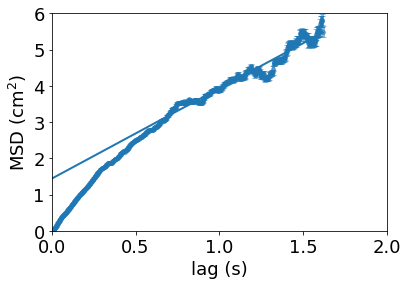

In [264]:
# xlim=.75#2.#3#.2#
# ylim=3#15#6#30#3
xlim=2.#3#.2#
ylim=6#30#3
#plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

lagt_values=df_in['lagt'].values[:10000000:100]
msd_values=df_in['msd'].values[:10000000:100]    
# ax.scatter(lagt_values*xscale,msd_values,alpha=0.008,color='gray',s=1)#,alpha=1,color='k')
PlotMeanSquaredDisplacements(ax, x_values, y_values, y_err_values, y_hat_values,c=c)
# PlotMeanSquaredDisplacements(ax, fix_zero(x_values), fix_zero(y_values), fix_zero(y_err_values), fix_zero(y_hat_values),c=c)

# # plot a known value
# xval=(x_values-np.min(x_values))*2
# ax.plot(xval,xval*8,'k-')

ax.set_xlim([0,xlim])
ax.set_ylim([0,ylim])
ax.set_xlabel('lag (s)')
plt.show()

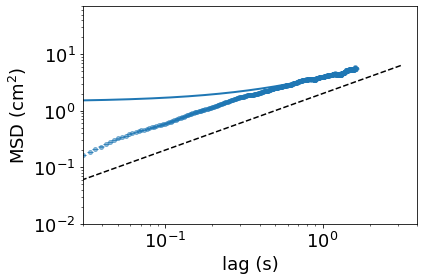

In [263]:
#### ylim=70
#plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

# # plot a known value
xval=(x_values-np.min(x_values))*2
ax.plot(xval,xval*.5*4,'k--')

# # lagt_values=df_in['lagt'].values[:1000000:10]
# # msd_values=df_in['msd'].values[:1000000:10]    
# ax.scatter(lagt_values*xscale,msd_values,alpha=0.03,color='gray',s=1)#,alpha=1,color='k')
# lagt_values=df_in['lagt'].values[:10000000:100]
# msd_values=df_in['msd'].values[:10000000:100]    
# ax.scatter(lagt_values*xscale,msd_values,alpha=0.08,color='green',s=1)#,alpha=1,color='k')
PlotMeanSquaredDisplacements(ax, x_values, y_values, y_err_values, y_hat_values,c=c)

# # # plot a known value
# xval=(x_values-np.min(x_values))*2
# ax.plot(xval,xval*8,'k--')
ax.set_xlim([.03,4])
ax.set_ylim([.01,ylim])
ax.set_xlabel('lag (s)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [265]:
#save msd xy values as csv
file_out_boot=os.path.join(trial_folder_name,f'bootstrapped_{basestr}_bins_{bins}.csv')
df_bootstrapped=pd.DataFrame({
    'lagt_sec':x_values, 'msd_cm2':y_values, 'Delta_msd_cm2':y_err_values, 'hat_msd_cm2':y_hat_values
})
df_bootstrapped.to_csv(file_out_boot,index=False)
print('bootstrapped results saved in:')
print(file_out_boot)
beep(10)

bootstrapped results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/bootstrapped_msd_time_bins_auto.csv


0

In [ ]:
#Control /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/bootstrapped_msd_particle_bins_30.csv
# #fitting from this particle model gave D=2.00(1) cm^2/s, as expected
# xscale=0.001 #seconds per ms
# xmin=10. #ms
# xmax=2000 #ms


#tolerable LR msd (particle)
# /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/bootstrapped_msd_particle_bins_30.csv
# xscale=0.001 #seconds per ms
# xmin=0. #ms
# xmax=2000 #ms

## (optional) repeat computation of D with the apparently less precise method of weighted averages

In [ ]:
#extract values
x_scale=0.001 #sec per ms
x_values = df_in['lagt'].values*x_scale
y_values = df_in['msd'].values/x_values

#bin and bootstrap results
bins = 30#'auto'  #
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel='lagt',
                                       ylabel='y',
                                       bins=bins,
                                       min_numobs=None,
                                       num_bootstrap_samples=1000,
                                       npartitions=npartitions)
df_msdt = pd.DataFrame(dict_out)
df_msdt.head()

In [ ]:
#compute D_apparent using a weighted average
j0=1 #first value to use
x=df_msdt['lagt'].values[j0:]
y=df_msdt['y'].values[j0:]/4
y_err=df_msdt['Delta_y'].values[j0:]/4
w=df_msdt['counts'].values[j0:]
w=w/np.sum(w)
D_apparent=np.sum(w*y)
#estimate 95% CI of D_apparent using a weighted average
Delta_D_apparent=np.sqrt(np.sum(w*y_err**2))
print(f"The weighted average of each lag bin was")
print(f"D_apparent={D_apparent:.4f}+-{Delta_D_apparent:.4f} cm^2/s")
print(f"The mean time between two lag bins was {np.mean(np.diff(x)):.3f} seconds")

In [ ]:
from lib.viewer.bluf.plot_func import *
fontsize=18
alpha=0.5
c='C3'
elinewidth=3
markersize=4
capsize=3
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
#naive plot of MSD/lagt versus lagt
x=df_msdt['lagt'].values
y=df_msdt['y'].values/4
y_err=df_msdt['Delta_y'].values/4
ax.errorbar(x,y,y_err,c=c,
            alpha=alpha,
            fmt='o',
            markersize=markersize,
            ecolor=c,
            elinewidth=elinewidth,
            errorevery=1,
            capsize=capsize
           )
ax.plot(x,0.*x+8/4,'k-')
format_plot_general(ax=ax,xlabel=r'$\tau$ (seconds)',ylabel=r'MSD$/4\tau$ (cm$^2$/s)',fontsize=fontsize,use_loglog=False)#,**kwargs)
plt.show()

In [ ]:
# from lib import *
# from lib.viewer.PlotMeanSquaredDisplacements import PlotMeanSquaredDisplacements

# df=pd.read_csv(input_fn)
# #compute t0 and tf for each particle
# dft=df.groupby(pid_col)[t_col].describe()
# dft0=dft['min']
# dftf=dft['max']

# #compute t1 and t2 for each particle
# dft1=dft0+crop_start_by
# dft2=dftf-crop_end_by

# #get the list of particles dft2-dft1 \ge minimum_lifetime
# dflifetime_considered=dft2-dft1
# pid_values_to_consider=dflifetime_considered[dflifetime_considered>=minimum_lifetime].index.values

# # for pid in pid_values_to_consider[:]:
# #     #     lagt_values,msd_values=compute_individual_mean_squared_displacement(df,dft1,dft2,DT,pid,pid_col=pid_col)
# #     lagt_values,msd_values=df_msd_example[df_msd_example['pid']==pid][['lagt','msd']].values.T
# #     ax.plot(lagt_values*xscale,msd_values,alpha=0.4,color='gray')

In [ ]:
# df_msd_example=compute_each_mean_squared_displacement(input_fn,**kwargs)
# df_msd_example.head()

In [ ]:
beep(5)

In [ ]:
# #TODO(later): make text interface for choosing new max_lagtime. Note max_lagtime is in units of frames, not time...
# print(f"If you want to save memory and decrease runtime decide on a reasonable value for max_lagtime!  maxt={max_lagtime}")

#TODO: load all of ^those imsd into python and compute the mean imsd, binning by lagt
#TODO: save resulting emsd to csv
#TODO: generate plots
#TODO: look at plots and decide whether to change the default tau_min and tau_max
#TODO: compute linear regression with tau_min and tau_max

# compute D 

as the mean value of D computed on a trial by trial basis.  Bootstrap to compute Delta_D

- DONE: try per trial basis
- TODO: try per particle basis


In [ ]:
#TODO: verify that I moved this to lib and added the effected .py file to __init__.py
def compute_D(df,xscale=0.001,xmin=0.,xmax=500.):
    #compute the linear fit of bootstrapped msd
    #     df=df_emsd
    #     xscale=0.001 #seconds per ms
    #     xmin=0. #ms
    #     xmax=500 #ms
    xmin*=xscale
    xmax*=xscale
    x_values=df['lagt'].values*xscale
    y_values=df['msd'].values
    x_err_values=df['Delta_lagt'].values
    y_err_values=df['Delta_msd'].values
    counts=df['counts'].values

    #fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
    boo=(x_values>xmin)&(x_values<xmax)
    x=x_values[boo]
    y=y_values[boo]
    dict_force_fit=compute_95CI_ols(x,y)
    y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

    #(optional) rename specific values
    dict_force_fit=dict_force_fit
    y_hat_values=y_hat_values
    D=dict_force_fit['m']/4
    return D
    
#     #bluf
#     print(f"the ols fit for diffusion coefficient, D={:.4f} is:")
#     print_dict(dict_force_fit)
#     print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
#     print(f"trial_folder_name: {trial_folder_name}")

def return_compute_D(msd_fn,bins='auto'):
    ''''''
    df_in=pd.read_csv(msd_fn)
    #extract values
    lagt_values = df_in['lagt'].values
    msd_values = df_in['msd'].values
    #bin and bootstrap results
    #'auto'  #
    df_emsd = bin_and_bootstrap_xy_values(x=lagt_values,
                                           y=msd_values,
                                           xlabel='lagt',
                                           ylabel=r'msd',
                                           bins=bins,
                                           min_numobs=None,
                                           num_bootstrap_samples=1000,
                                           npartitions=npartitions,
                                         printing=False)
    return compute_D(df_emsd)



In [ ]:
# #input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
# #Load example particle Log file where I want to compute MSD and tracking has already been done 
# #(good): data that uses explicit particle tracking
# # input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"
# # input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'

#TODO: no attraction, no annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: attraction with annihilation

#TODO: attraction with annihilation but without diffusion

# #TODO: full models

# def return_msd_particle_average(input_fn,pid_col='pid_explicit',t_col='t',ds=10,width=10,height=10,
#                                 **kwargs):
#     '''    
#     input_fn is a .csv locating a trajectory file with particles identified by pid_col 
#     and time indicated by t_col
#     ds is the total domain size and width and height are the number of length units / pixels afforded to the original computational domain.
#     kwargs are passed to unwrap_traj_and_center
    
#     previously named return_msd_phys
#     TODO: GPU accelerate this pandas-like function with rapids cudf
#     '''
#     df=pd.read_csv(input_fn)
#     trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
    
    
#     #(bad)particle data analyzed using full model pipeline
#     # input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
#     # width=10 #width of computational domain
#     # ds   =10  #cm
#     # #from here on, we will use units in terms of those used by the full model
#     # height=width
#     DS=ds/width

#     #unwrap trajectories
#     pid_lst = sorted(set(df[pid_col].values))
#     #(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
#     # pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
#     df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, **kwargs) for pid in pid_lst])
#     DT=get_DT(df,pid_col=pid_col) #ms
#     df[df.frame==2].describe()
#     df['sd']=df['x']**2+df['y']**2
#     d_msd=df.groupby('t')['sd'].mean()
#     lagt_values=d_msd.index.values
#     msd_values=d_msd.values
#     return lagt_values,msd_values

# def compute_D_OLS_2D(lagt_values,msd_values,
#                 tmin=0,
#                 tmax=0,
#                 tscale=0.001,
#                 DS=1.):
#     xmin=tmin*tscale
#     xmax=tmax*tscale
#     x_values=lagt_values*tscale
#     y_values=msd_values*DS**2
#     # x_err_values=df['Delta_lagt'].values
#     # y_err_values=df['Delta_msd'].values
#     # counts=df['counts'].values

#     #fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
#     boo=(x_values>xmin)&(x_values<xmax)
#     x=x_values[boo]
#     y=y_values[boo]
#     dict_force_fit=compute_95CI_ols(x,y)
#     y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

#     #(optional) rename specific values
#     dict_force_fit=dict_force_fit
#     y_hat_values=y_hat_values
#     D=dict_force_fit['m']/4
#     Delta_D=dict_force_fit['D']/4
#     dict_out={
#         'D':D,
#         'Delta_D':Delta_D,
#         'Rsquared':dict_force_fit['Rsquared']
#     }
#     return D

In [ ]:
D_apparent_lst=[]
for fn in list_of_files:
    D_apparent_lst.append(return_compute_D(fn))
    
print(np.mean(D_apparent_lst))
print(np.std(D_apparent_lst))

In [ ]:
beep(2)

In [ ]:
n=13
print(np.gmean(D_apparent_lst[:n]))
print(np.std(D_apparent_lst[:n]))

In [ ]:
import numpy as np

# def geo_mean_overflow(iterable):
#     a = np.log(iterable)
#     return np.exp(a.mean())

geo_mean_overflow(D_apparent_lst),np.median(D_apparent_lst),np.mean(D_apparent_lst)

I doubt computing individual particle's D values will have a significant effect on the average value when breaking up by trial did not...

It would lend itself to filtering any false tips

The ensemble-averaged mean squared displacement was computed according to 

$$
\text{MSD}_\text{ensemble}(\tau)=\mathbb{E}_i\Big[ (r_i(\tau) - r_i(0) )^2  \Big]
$$


The time-averaged mean squared displacement was computed according to 

$$
\text{MSD}_\text{time}(\tau)=\mathbb{E}_i\Big[\mathbb{E}_t\Big[ (r_i(t+\tau) - r_i(t) )^2  \Big]\Big]
$$


In [ ]:
df=pd.read_csv(input_fn)
unwrap_trajectories?

In [ ]:
pid_col='pid_explicit'
t_values=np.array(sorted(set(df.t.values)))
pid_values=np.array(sorted(set(df[pid_col].values)))

In [ ]:
t0=np.min(t_values)
x0_values=df.loc[df.t==t0,'x'].values
y0_values=df.loc[df.t==t0,'y'].values

In [ ]:
# for pid in pid_values:
#     #select particle and extract trajectory
#     #subtract off initial position
#     #compute the norm / magnitude of the net displacement at each time point
#     #add each time point to a running total at each time point
#     #increment the count of observations at each time point

In [ ]:
# xyt_values=df[df[pid_col]==pid][['x','y','t']].values
# xyt_values-=xyt_values[0]
# lag_values=xyt_values[:,-1]
# displacement_values=xyt_values[:,:2]
# displacement_values

In [ ]:
x

In [ ]:
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(return_msd_particle_average)
start = time.time()
tuple_lst=list(b)
# D_apparent_lst = list(b)
# print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
# beep(3)
# print((geo_mean_overflow(D_apparent_lst),np.median(D_apparent_lst),np.mean(D_apparent_lst),np.std(D_apparent_lst)))
# list_of_files=retval
# list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# # list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
# print(f"wrote {len(list_of_files)} output files to a common folder")
# assert (len(list_of_files)>0)

Testing a straight forward computation of D, where we average over space first...

```
run time for computing mean squared displacements was 386.86 seconds.
(2.2207477027140863, 2.048612039525339, 2.759752260725528, 3.392611667160421)
```

So... Those don't match except for the median...


TODO: try computing the sum and the count for each time bin over all particles found in all trajectory files...


# compute dRdt versus R with unconditioned sampling
- DONE: token example from particle model
- DONE: full model (FK)
- TODO: full model (LR)

In [ ]:
from lib.measure.bootstrap import bin_and_bootstrap_xy_values

In [ ]:
#input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
#Load example particle Log file where I want to compute MSD and tracking has already been done 
#(good): data that uses explicit particle tracking
input_fn=search_for_file()

#DONE: no attraction, no annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO(later): no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"

#DONE: attraction with annihilation but without diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"

#DONE: attraction with annihilation but with diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"

# input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
pid_col='pid_explicit'
t_col='t'
width=10 #width of computational domain
ds   =10  #cm


# input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
pid_col='particle'
t_col='t'
width=200 #width of computational domain
ds   =5  #cm


#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
kwargs={}

#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width
DT=get_DT(df,pid_col=pid_col);print(f"DT={DT} ms")
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease manually review the key word arguments in kwargs.")

In [ ]:
#TODO(later): update this block with the kwargs for get_routine_for_computing_dRdt_in_bulk
# tmin=0#ms
tmin=100#ms
frame_min=int(tmin/DT) #first frame to consider for this folder

In [ ]:
#DONE: update routine_for_computing_dRdt_in_bulk to use pid_col instead of particle
#TODO: figure out the conversion from crop_start_by amd crop_end_by for use in routine_for_computing_dRdt_in_bulk
kwargs={
    'DT':DT,
    'ds':ds,
    'width':width,
    'pid_col':pid_col,
    't_col':t_col,
    'use_drop_shorter_than':True,
   'drop_shorter_than':50,#150, #ms
   'round_t_to_n_digits':5,
   'frame_min':frame_min,
   'num_frames_between':1,
   'use_random_frames':False,
   'num_random_frames':50
}

In [ ]:
get_all_longer_than

In [ ]:
use_test=True
routine_for_computing_dRdt_in_bulk = get_routine_for_computing_dRdt_in_bulk(**kwargs)
if use_test:
    #optionally test the routine
    retval=routine_for_computing_dRdt_in_bulk(input_fn)
    print(pd.read_csv(retval).head())

def routine(input_fn):
    try:
        return routine_for_computing_dRdt_in_bulk(input_fn)
    except Exception as e:
        return f"Warning: something went wrong, {e}"

In [ ]:
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
npartitions=os.cpu_count()
npartitions=8

input_fn_lst=get_log_files(trial_folder_name, extension='/trajectories/', trgt='.csv')
# input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='.csv')
# # input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')
print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

In [ ]:
# WARNING: this took 8 hours for 200 trials over 12 cores...
# ^this suggests a run time of ~30 minutes per file
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
beep(3)

list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
print(f"wrote {len(list_of_files)} output files to a common folder")
assert (len(list_of_files)>0)

In [ ]:
find_list_of_files=False

#merge all csv files into one big-ol' csv file
pid_col='pid'
folder_out_name=os.path.basename(os.path.dirname(fn))
save_fn=folder_out_name+'.csv'
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),save_fn)
folder_name=folder_out_name
# folder_name='/radial_neighbor_velocities_framemin_4000_numframesbetween_1_maxdistthrsh_5/'
if find_list_of_files:
    #find all files successfully saved for computing dRdt in bulk
    trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
    list_of_files=get_log_files(trial_folder_name, extension=folder_name, trgt='.csv')
    assert (len(list_of_files)>0)
    print(len(list_of_files))

In [ ]:
#TODO: add pid field to dRdt data unconditioned on annihilation
#TODO: add event_id field to dRdt data
provide_event_id=False
#merge all csv files into one big-ol' csv file
file_in=os.path.join(trial_folder_name,f'drdt_'+save_fn)
# file_in=os.path.join(trial_folder_name,f'drdt.csv')
reval=produce_one_csv(list_of_files, file_in,provide_event_id=provide_event_id)#, encoding="utf-8")
print('merged results saved in:')
print(file_in)
beep(10)

In [ ]:
#DONE: check routine_for_computing_dRdt_in_bulk outputs R in cm and dRdt in cm/s
# ^that computes DS=ds/width and passes DS to comp_radial_velocities_between_frames, which scales output from raw according to 
# #compute dRdt and average R for those tips
# dRdt_out=DS*(R_nxt-R_prv)/DT
# #optionally, measure range from previous time point only
# if use_forward_R:
#     R_out=R_prv
# else:
#     R_out=DS*0.5*(R_nxt+R_prv)

#all drdt for all bulk in 
# file_in="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/drdt.csv"

#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
df_in.head()

In [ ]:
bins=20#30#'auto'#
#extract values
r_values=df_in['r'].values
drdt_values=df_in['drdt'].values

from lib.measure.bootstrap import bin_and_bootstrap_xy_values
import dask.bag as db
num_bootstrap_samples=1000
min_numobs=None
# file_in='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/drdt.csv'
npartitions=os.cpu_count()
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
#extract values
xlabel='r'
ylabel='drdt'
x_values=df_in[xlabel].values
y_values=df_in[ylabel].values

#bin and bootstrap results
npartitions=os.cpu_count()
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel=xlabel,
                                       ylabel=ylabel,
                                       bins=bins,
                                       min_numobs=min_numobs,
                                       num_bootstrap_samples=num_bootstrap_samples,
                                       npartitions=npartitions)
df_drdt = pd.DataFrame(dict_out)
df_drdt.head()

In [ ]:
#save ensemble drdt
#merge all csv files into one big-ol' csv file
# file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'ensemble_drdt_bins_{bins}.csv')
file_out=os.path.join(os.path.dirname(file_in),f'ensemble_drdt_numfiles_{num_files}_bins_{bins}.csv')
df_drdt.to_csv(file_out,index=False)
print('merged results saved in:')
print(file_out)
beep(10)

In [ ]:
#compute the fit
df=df_drdt
rmin=0. #cm
rmax=4 #cm
tscale=0.001 #sec per ms
lscale=1. #cm per cm
r_values=df['r'].values*lscale
drdt_values=df['drdt'].values/tscale*lscale
Delta_r_values=df['Delta_r'].values*lscale
Delta_drdt_values=df['Delta_drdt'].values/tscale*lscale
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"varkappa_apparent={dict_force_fit['m']:.3f}+-{dict_force_fit['Delta_m']:.3f}")
print(f"the ols fit was computed from {rmin:.3f} to {rmax:.3f} cm:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"trial_folder_name: {trial_folder_name}")

In [ ]:
ylim=250#25
c='C0'
yscale=1.
xlim=np.max(x_values)-.01
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
PlotMeanRadialVelocities(axs, x_values, y_values*yscale, y_err_values*yscale, y_hat_values*yscale,c=c,#c='C3',
    alpha=0.4,
    fontsize=18,
    elinewidth=3,
    markersize=4,
    capsize=3,
    xlim0=[0, xlim],
    xlim1=[0, 60])#4])
axs[0].plot(x_values*1.1-np.min(x_values),0.*x_values,'k--',alpha=0.7)
axs[1].plot((x_values-np.min(x_values))*5,0.*x_values,'k--',alpha=0.7)
axs[0].set_ylim([-ylim,ylim])

axs[1].set_ylim([-ylim,ylim])
plt.tight_layout()
plt.show()

In [ ]:
#extract values
r_values=df_in['r'].values
drdt_values=df_in['drdt'].values

from lib.measure.bootstrap import bin_and_bootstrap_xy_values
import dask.bag as db
num_bootstrap_samples=1000
bins='auto'
min_numobs=None
# file_in='/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/drdt.csv'
npartitions=os.cpu_count()
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
#extract values
xlabel='r'
ylabel='drdt'
x_values=df_in[xlabel].values
y_values=df_in[ylabel].values

In [ ]:
#extract values
npartitions=os.cpu_count()
#extract values
xlabel='r'
ylabel='rdrdt'
x_values=df_in['r'].values
y_values=df_in['drdt'].values*x_values
num_bootstrap_samples=1000
min_numobs=None
#bin and bootstrap results
bins=30#'auto'
npartitions=os.cpu_count()
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel=xlabel,
                                       ylabel=ylabel,
                                       bins=bins,
                                       min_numobs=min_numobs,
                                       num_bootstrap_samples=num_bootstrap_samples,
                                       npartitions=npartitions)
df_rdrdt = pd.DataFrame(dict_out)
df_rdrdt.head()

In [ ]:
#estimate varkappa using weighted average
xmin=0
xmax=1
x=df_rdrdt[xlabel].values
boo=(x>=xmin)&(x<=xmax)
y=df_rdrdt[ylabel].values[boo]/xscale
y_err=df_rdrdt[f'Delta_{ylabel}'].values[boo]/xscale
w=df_rdrdt['counts'].values[boo]
w=w/np.sum(w)
varkappa_apparent=np.sum(w*y)
#estimate 95% CI of D_apparent using a weighted average
Delta_varkappa_apparent=np.sqrt(np.sum(w*y_err**2))
print(f"The weighted average of each R bin was")
print(f"varkappa_apparent={varkappa_apparent:.4f}+-{Delta_varkappa_apparent:.4f} cm^2/s")
print(f"The mean distance between two R bins was {np.mean(np.diff(x[boo])):.3f} cm")
print(f"This weighted average considered {xmin}<=R<={xmax} cm")

In [ ]:
from lib.viewer.bluf.plot_func import *
xscale=0.001
fontsize=18
alpha=0.5
c='C0'
elinewidth=3
markersize=4
capsize=3
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
#naive plot of dRdt*R versus R
x=df_rdrdt[xlabel].values
y=df_rdrdt[ylabel].values/xscale
y_err=df_rdrdt[f'Delta_{ylabel}'].values/xscale
ax.errorbar(x,y,y_err,c=c,
            alpha=alpha,
            fmt='o',
            markersize=markersize,
            ecolor=c,
            elinewidth=elinewidth,
            errorevery=1,
            capsize=capsize
           )
ax.plot(x,0.*x-5,'k-')
ax.plot(x,0.*x,'k--')
ax.set_ylim([-6,4])
format_plot_general(ax=ax,xlabel=r'R (cm)',ylabel=r'$R\,dR/dt$ (cm$^2$/s)',fontsize=fontsize,use_loglog=False)#,**kwargs)
plt.show()

In [ ]:
beep(3)